*** This notebook is best viewed in Google Colab ***

# Furniture classification using CNN
Deep Learning Image Classification by Mihir Ojha

March 3, 2023

Image classification is the task of assigning a label or category to an image. Deep learning has revolutionized the field of image classification by providing highly accurate and efficient methods. Convolutional neural networks (CNNs) are the most popular deep learning approach for image classification. CNNs consist of multiple layers of interconnected neurons that learn to detect different features of the input image, such as edges, shapes, and textures. The final layer of the network produces a probability distribution over the different categories or labels. To train a CNN, a large dataset of labeled images is required. The network is trained by adjusting the weights of its neurons based on the difference between the predicted and actual labels. Once trained, the CNN can classify new images with high accuracy, making it useful for a variety of applications.

This image classification project uses a basic convolutional neural network (CNN) architecture to classify furniture images into three categories: bed, chair, and sofa. The model was implemented in Python using the Keras, and tensorflow library and achieved a relatively high accuracy given the small smaple size. In addition to the model, I also made a Flask API and a Docker image for easy deployment. Further details about the project, including the dataset used and the model architecture, and how to run the docker app can be found my Github page: https://github.com/MihirOjha/Furniture_classification_CNN. 

The project showcases the effectiveness of CNNs for image classification and demonstrates the ability to build and deploy deep learning models for practical applications.

Table of Contents

>[Furniture classification using CNN](#scrollTo=2obOMFEiCS9v)

>>>[Mounting my google drive](#scrollTo=952U54uZHEkv)

>>>[Splitting the data into training, testing, and validation sets](#scrollTo=k3v3hYfHFu_8)

>>>[Building the CNN Model Architecture](#scrollTo=6xceVs-PFhrR)

>>>[Training the Model](#scrollTo=5bI3S45XFc09)

>>>[Evaluating the Model](#scrollTo=dmUfpUlwC_BX)

>>>[Making Predictions and generating classification report](#scrollTo=HKBCL46CDHKR)

>>>[Saving the model](#scrollTo=iF6_vrfEDdGy)

>>>[Final thoughts](#scrollTo=IQoe1wotE9jO)



### Mounting my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip list

In [ ]:
import os
import shutil
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
!unzip '/content/drive/MyDrive/CNN_test/Dataset.zip' -d /content/

Archive:  /content/drive/MyDrive/CNN_test/Dataset.zip
   creating: /content/Data for test/Bed/
  inflating: /content/Data for test/Bed/120cm Bed with underbed drawer.jpg  
  inflating: /content/Data for test/Bed/140 cm double bed.jpg  
  inflating: /content/Data for test/Bed/160 cm kingsize bed.jpg  
  inflating: /content/Data for test/Bed/180 cm super kingsize bed.jpg  
  inflating: /content/Data for test/Bed/90cm Bed with underbed drawer.jpg  
  inflating: /content/Data for test/Bed/Addison King Bed.jpg  
  inflating: /content/Data for test/Bed/Aidan Bed-Heavy Pebble Pewter-Queen.jpg  
  inflating: /content/Data for test/Bed/Aidan Bed-Vintage Tobacco-King.jpg  
  inflating: /content/Data for test/Bed/Aidan King Bed-Pebble Pewter.jpg  
  inflating: /content/Data for test/Bed/Aiden Velvet Bed.jpg  
  inflating: /content/Data for test/Bed/ALBI BED.jpg  
  inflating: /content/Data for test/Bed/Alexander Queen Bed.jpg  
  inflating: /content/Data for test/Bed/Alina Full Platform Bed Frame

In [ ]:
# # this renames all the files into a standard format
# # define the paths to the input dataset

# input_path = "/content/Data for test"

# # loop over the bed, chair, and sofa folders in the input directory
# for folder_name in ["Bed", "Chair", "Sofa"]:
#     folder_path = os.path.join(input_path, folder_name)
#     # loop over the files in the folder
#     for i, file_name in enumerate(os.listdir(folder_path)):
#         file_path = os.path.join(folder_path, file_name)
#         # generate the new file name by appending the folder name and a number
#         new_file_name = folder_name.lower() + "_" + str(i + 1) + ".jpg"
#         new_file_path = os.path.join(folder_path, new_file_name)
#         # rename the file with the new name
#         os.rename(file_path, new_file_path)

### Splitting the data into training, testing, and validation sets <a name = 'Splitting-the-data-into-training-, testing-, and validation-sets'></a>

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/Data for test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    "/content/Data for test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 210 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


This code defines two generators for image data, train_datagen and val_datagen, which are used for data preprocessing and augmentation in a machine learning pipeline.

The train_datagen generator applies various transformations to input images during training, such as rescaling pixel values, shearing, zooming, and flipping. It also splits the data into 70% training and 30% validation sets.

val_datagen is a simpler generator that only rescales pixel values.

train_generator and validation_generator are created using flow_from_directory, which generates batches of augmented and preprocessed images on the fly for training and validation. The generators take the image data directory, target image size, batch size, and label type as input.

### Building the CNN Model Architecture <a name = 'Building-the-CNN-Model-Architecture'></a>

In [ ]:
# define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

### Training the Model <a name = 'Training-the-Model'></a>

In [ ]:
# train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
7/7 [==============================] - 33s 3s/step - loss: 1.2027 - accuracy: 0.4190 - val_loss: 0.9030 - val_accuracy: 0.5667
Epoch 2/10
7/7 [==============================] - 19s 3s/step - loss: 0.7442 - accuracy: 0.6619 - val_loss: 0.6326 - val_accuracy: 0.7444
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 0.5100 - accuracy: 0.8095 - val_loss: 0.5406 - val_accuracy: 0.8444
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.4997 - accuracy: 0.8524 - val_loss: 0.6083 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 17s 3s/step - loss: 0.4195 - accuracy: 0.8286 - val_loss: 0.3857 - val_accuracy: 0.8222
Epoch 6/10
7/7 [==============================] - 19s 3s/step - loss: 0.2982 - accuracy: 0.8857 - val_loss: 0.6084 - val_accuracy: 0.7556
Epoch 7/10
7/7 [==============================] - 17s 3s/step - loss: 0.3726 - accuracy: 0.8619 - val_loss: 0.3957 - val_accuracy: 0.8222
Epoch 8/10
7/7 [==================

### Evaluating the Model <a name = 'Evaluating-the-Model'></a>

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

3/3 [==============================] - 5s 2s/step - loss: 0.4689 - accuracy: 0.8444
Validation loss: 0.4688740670681
Validation accuracy: 0.8444444537162781


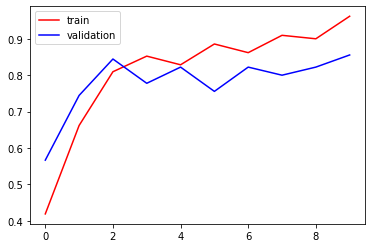

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### Making Predictions and generating classification report <a name = 'Making-Predictions-and-generating-classification-report'></a>

In [ ]:
# make predictions on validation set
y_pred = model.predict(validation_generator)

# convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# get true labels
y_true_labels = validation_generator.classes

# generate classification report
class_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# generate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print(conf_matrix)


3/3 [==============================] - 5s 2s/step
              precision    recall  f1-score   support

         Bed       0.36      0.30      0.33        30
       Chair       0.33      0.40      0.36        30
        Sofa       0.24      0.23      0.24        30

    accuracy                           0.31        90
   macro avg       0.31      0.31      0.31        90
weighted avg       0.31      0.31      0.31        90

[[ 9 10 11]
 [ 7 12 11]
 [ 9 14  7]]


### Saving the model <a name = 'Saving-the-model'></a>

In [ ]:
# save the model
model.save("image_classifier.h5")

### Final thoughts <a name = 'Final-thoughts'></a>

Overall I had fun working on this project beacause it introduced me to various topics and helped me get a practical introduction in my deep learning journey. I admit that this project is pretty basic, but it is my first project on deep learning. I will continue to do further projects on deep learning and applying other state of the art architectures. 

I also created a flask api and dockerized it. More informations can be found on my github page: https://github.com/MihirOjha/Furniture_classification_CNN